In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.isnull().sum() # No Null Values in data

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Branch and City Analysis

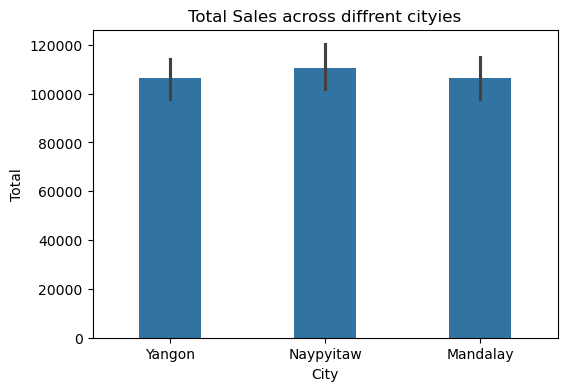

In [16]:
plt.figure(figsize = (6,4))
sns.barplot(x = "City",y = "Total",data = df,estimator = sum,width = 0.4)

plt.title("Total Sales across diffrent cityies")
plt.show()

The chart show minimal variation across diffrent cities indicating that customer demand for product is relatively consistant acrros diffrent loaction or in braches."All Branches nearly generate same revenue".

## Customer Distribution

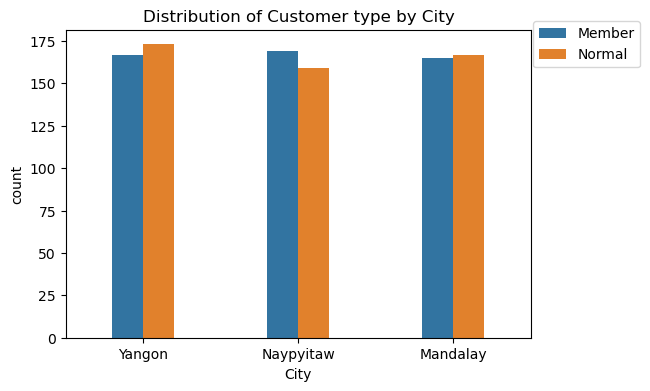

In [30]:
plt.figure(figsize = (6,4))
sns.countplot(x = "City",data = df,hue = "Customer type",width = 0.4)

plt.title("Distribution of Customer type by City")

plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05))
plt.show()

The graph show number of Member and Normal in each cities.

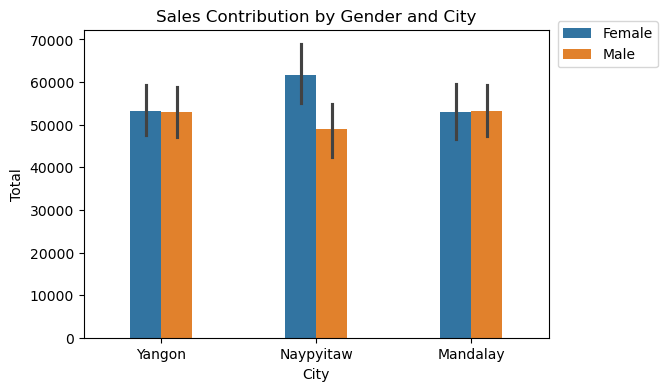

In [35]:
plt.figure(figsize = (6,4))
sns.barplot(x = "City",y = "Total",data = df,hue = "Gender",estimator = sum,width = 0.4)

plt.title("Sales Contribution by Gender and City")

plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05))
plt.show()

In Yangon and Mandalay, there is no significant difference in sales contributions between male and female customers, indicating a balanced gender distribution. However, in Naypyitaw, "female" customers contribute significantly more to sales compared to male customers

## Product Line Analysis

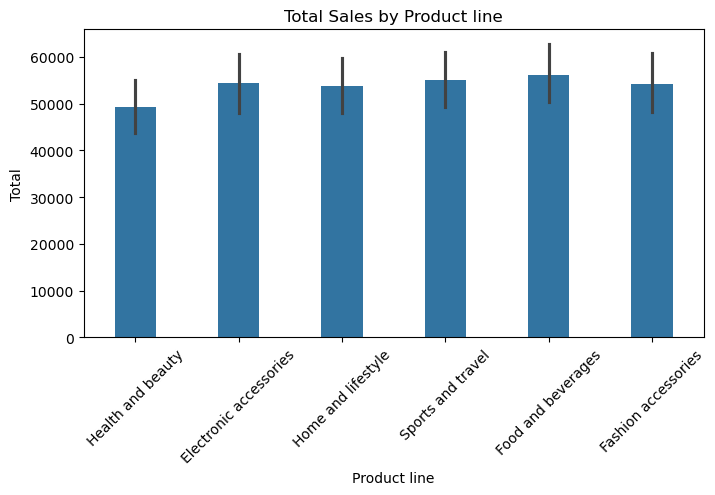

In [44]:
plt.figure(figsize = (8,4))
sns.barplot(x = "Product line",y = "Total",data = df,estimator = sum,width = 0.4)

plt.title("Total Sales by Product line")
plt.xticks(rotation = 45)
plt.show()

"Food and beverages" generates the highest total revenue among all product lines.
"Health and beauty" have lower revenue as comapare to other.

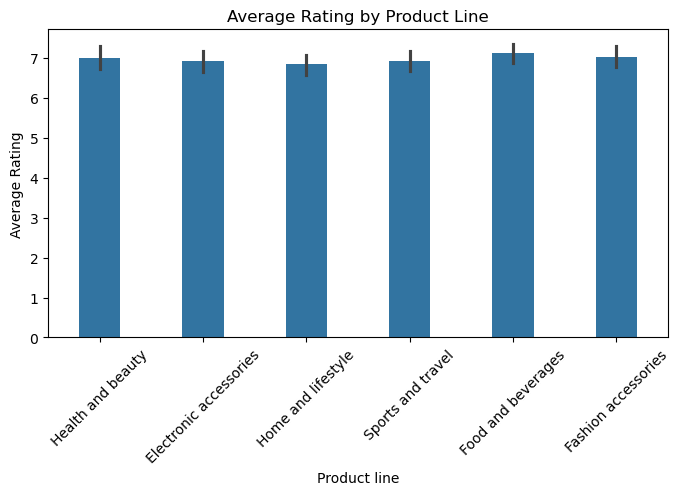

In [49]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Product line", y="Rating", data=df, estimator='mean', width=0.4)

plt.title("Average Rating by Product Line")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.show()


There is no significant diffrence in Rating of each Product line

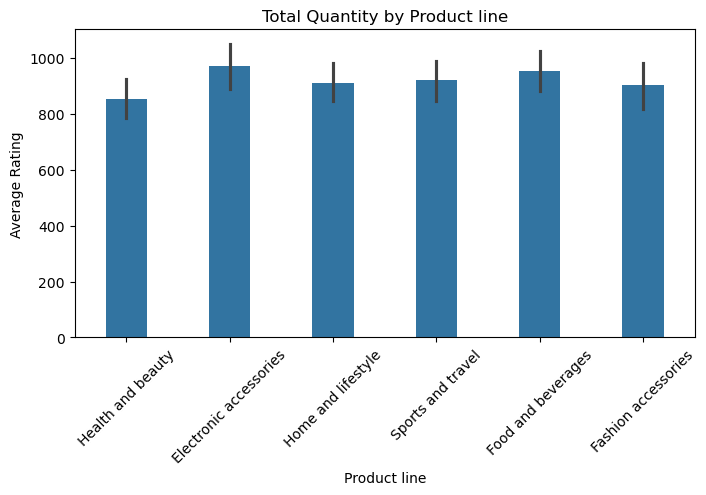

In [51]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Product line", y="Quantity", data=df, estimator='sum', width=0.4)

plt.title("Total Quantity by Product line")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.show()


From given chart "Electronic Accessories" sold highest Quantities.

## Sale Trend

In [60]:
df["Date"] = pd.to_datetime(df["Date"])

In [61]:
df["Months"] = df["Date"].dt.month # Extracting months from date to add new coloumn of months

In [68]:
df["Day_name"] = df["Date"].dt.day_name() # Extracting DAyname from date to add new coloumn of months

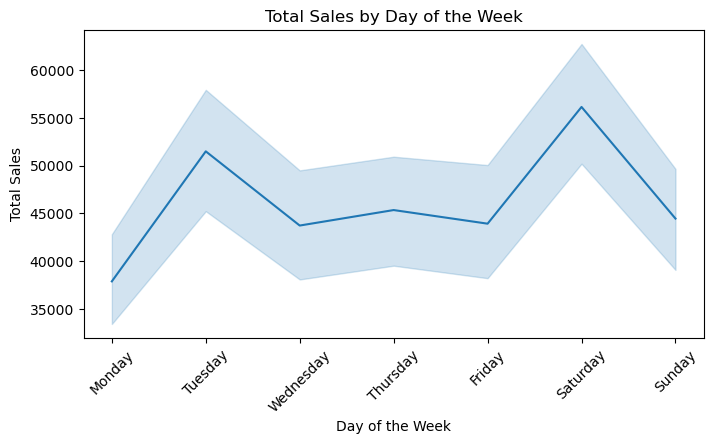

In [77]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Day_name"] = pd.Categorical(df["Day_name"], categories=day_order, ordered=True)

plt.figure(figsize=(8, 4))
sns.lineplot(x="Day_name", y="Total", estimator=sum, data=df)

plt.title("Total Sales by Day of the Week")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Day of the Week")
plt.show()


This chart show peak Sales on "Monday and Saturday". and lower on other days.

## Payment Method

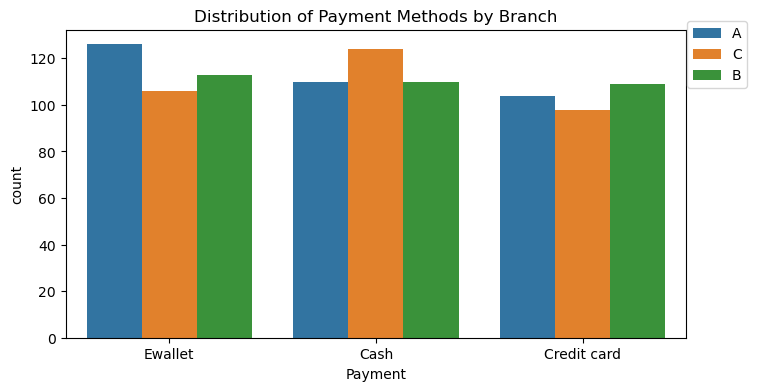

In [84]:
plt.figure(figsize = (8,4))
sns.countplot(x = "Payment",data = df,hue = "Branch")

plt.title("Distribution of Payment Methods by Branch")
plt.legend(loc="upper right", bbox_to_anchor=(1.11, 1.05))
plt.show()

"E-wallet" is most polpular in brach A, 
"Cash Payment" in branh C and 
"Credit card" usage is balance in all branches.

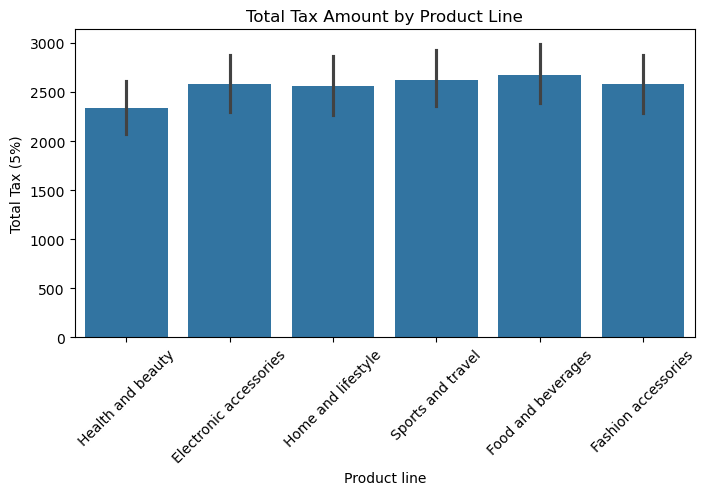

In [95]:
# Tax amount variation by product line
plt.figure(figsize=(8, 4))
sns.barplot(x="Product line", y="Tax 5%", data=df, estimator=sum)
plt.title("Total Tax Amount by Product Line")
plt.ylabel("Total Tax (5%)")
plt.xticks(rotation=45)
plt.show()


Health and beauty have low tax

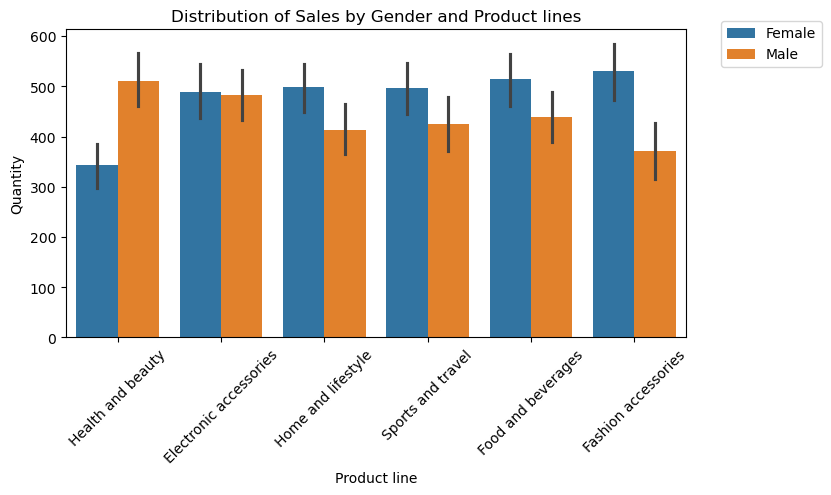

In [97]:
plt.figure(figsize = (8,4))
sns.barplot(x = "Product line",y = "Quantity",data = df,estimator = sum,hue = "Gender")

plt.title("Distribution of Sales by Gender and Product lines")
plt.xticks(rotation = 45)
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.05))
plt.show()

Males have high sales only in "Health and Beauty," while females have the highest sales across all other product types.